# Vizualizing phase trajectories of acceleration of different body movements

In [23]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as linalg
from sklearn.decomposition import PCA

from src.data_loading import creat_time_series, set_data_types

In [24]:
DATA_DIR = "../../data/"
ACT_LABELS = ["dws","ups", "wlk", "jog", "std", "sit"]
NUM_PARTICIPANTS = 24
SAMPLES_PER_ACTIVITY = 3
TRIAL_CODES = {
    ACT_LABELS[0]:[1],
    ACT_LABELS[1]:[3],
    ACT_LABELS[2]:[7],
    ACT_LABELS[3]:[9],
    ACT_LABELS[4]:[6],
    ACT_LABELS[5]: [5]
}

PHASE_SPACE_DIM = 20

[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series
[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series
[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series
[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series
[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series
[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series


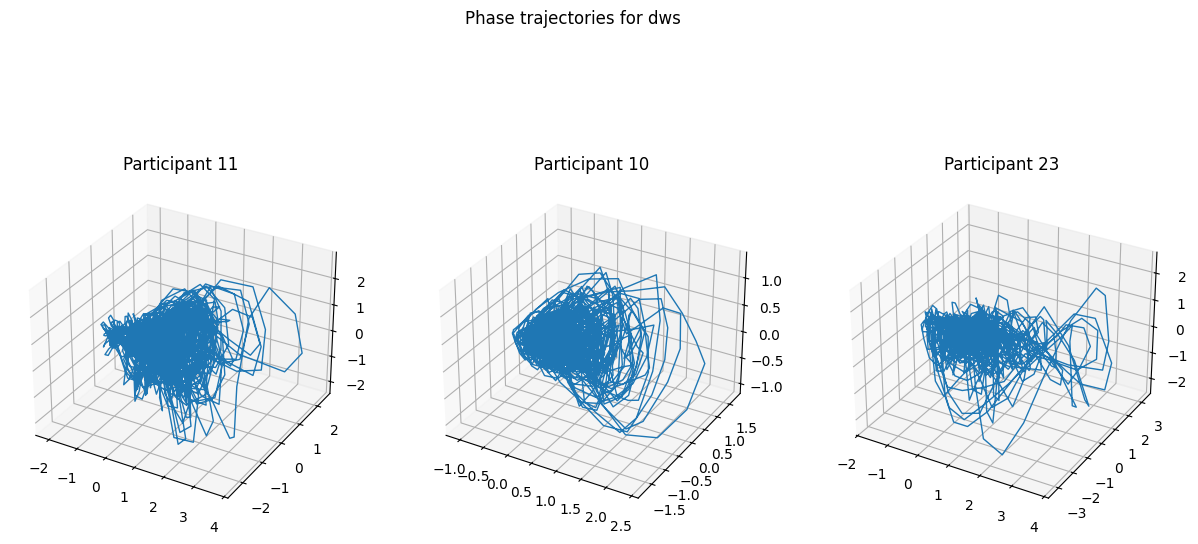

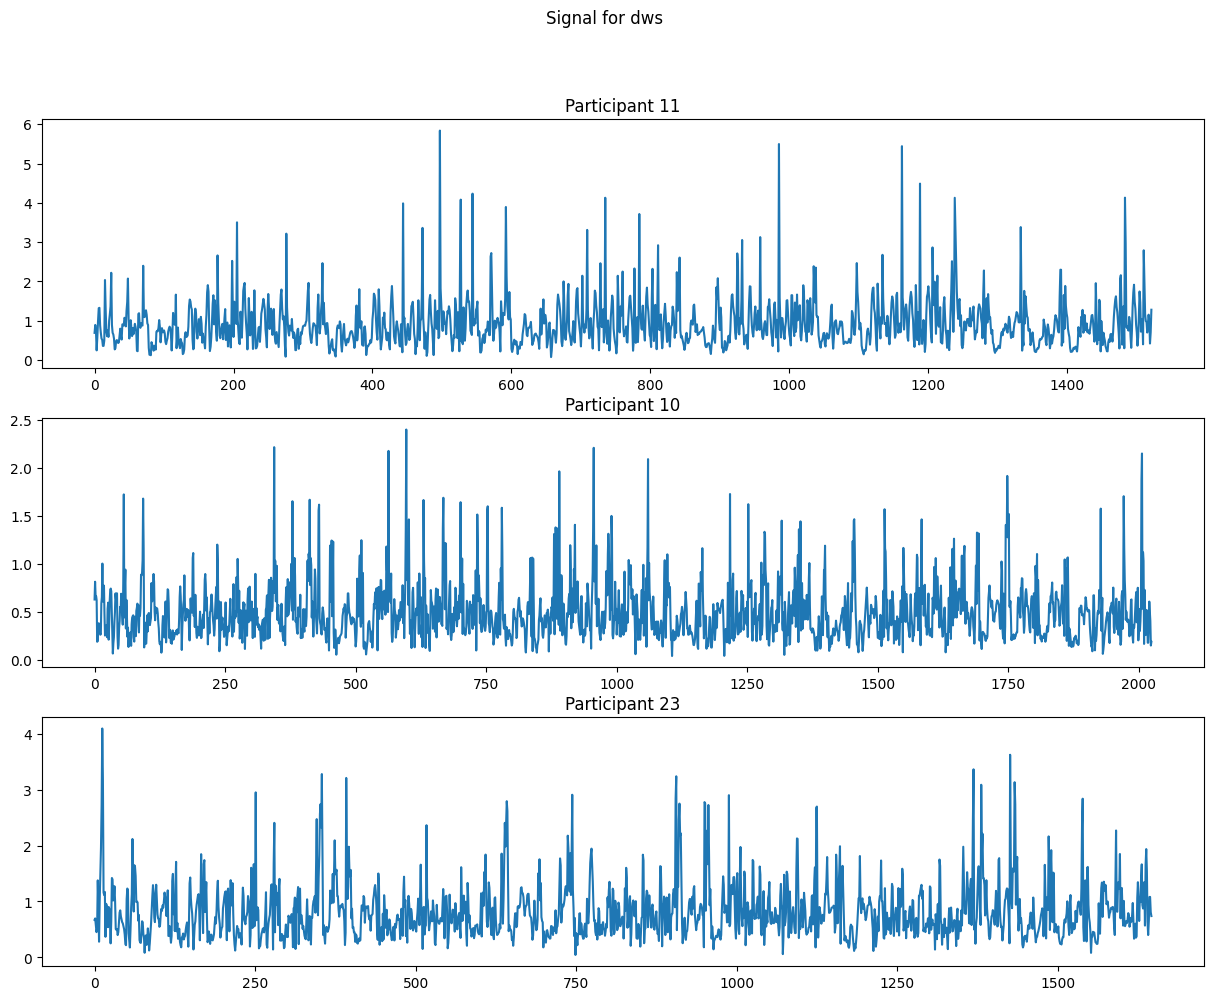

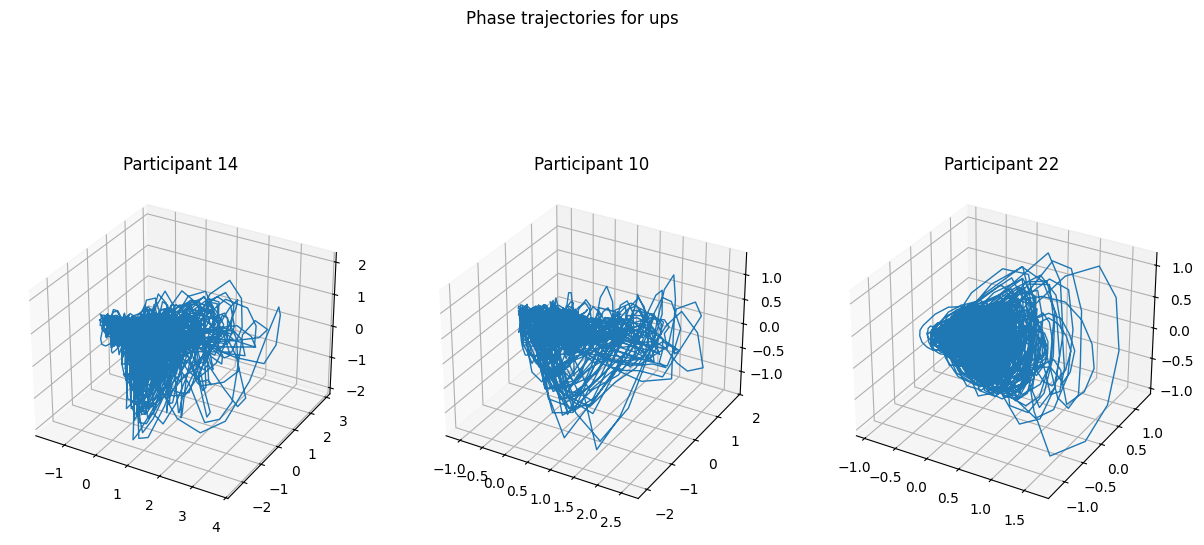

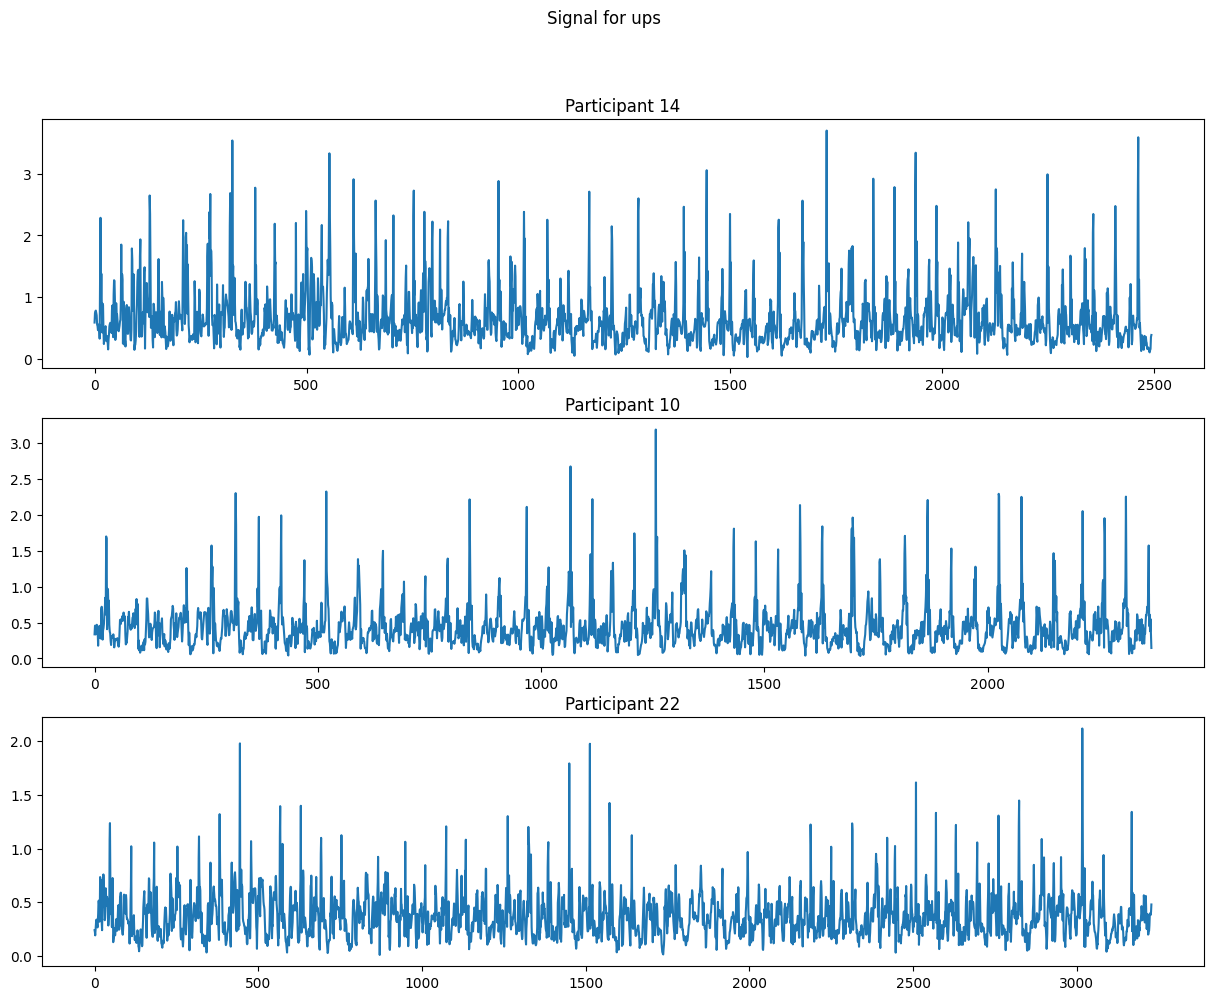

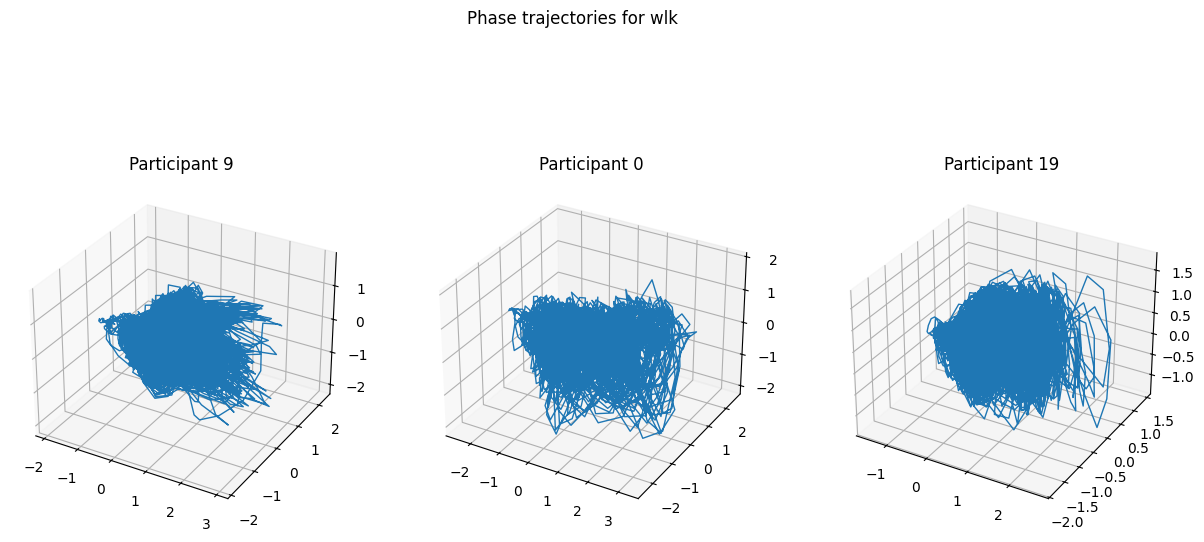

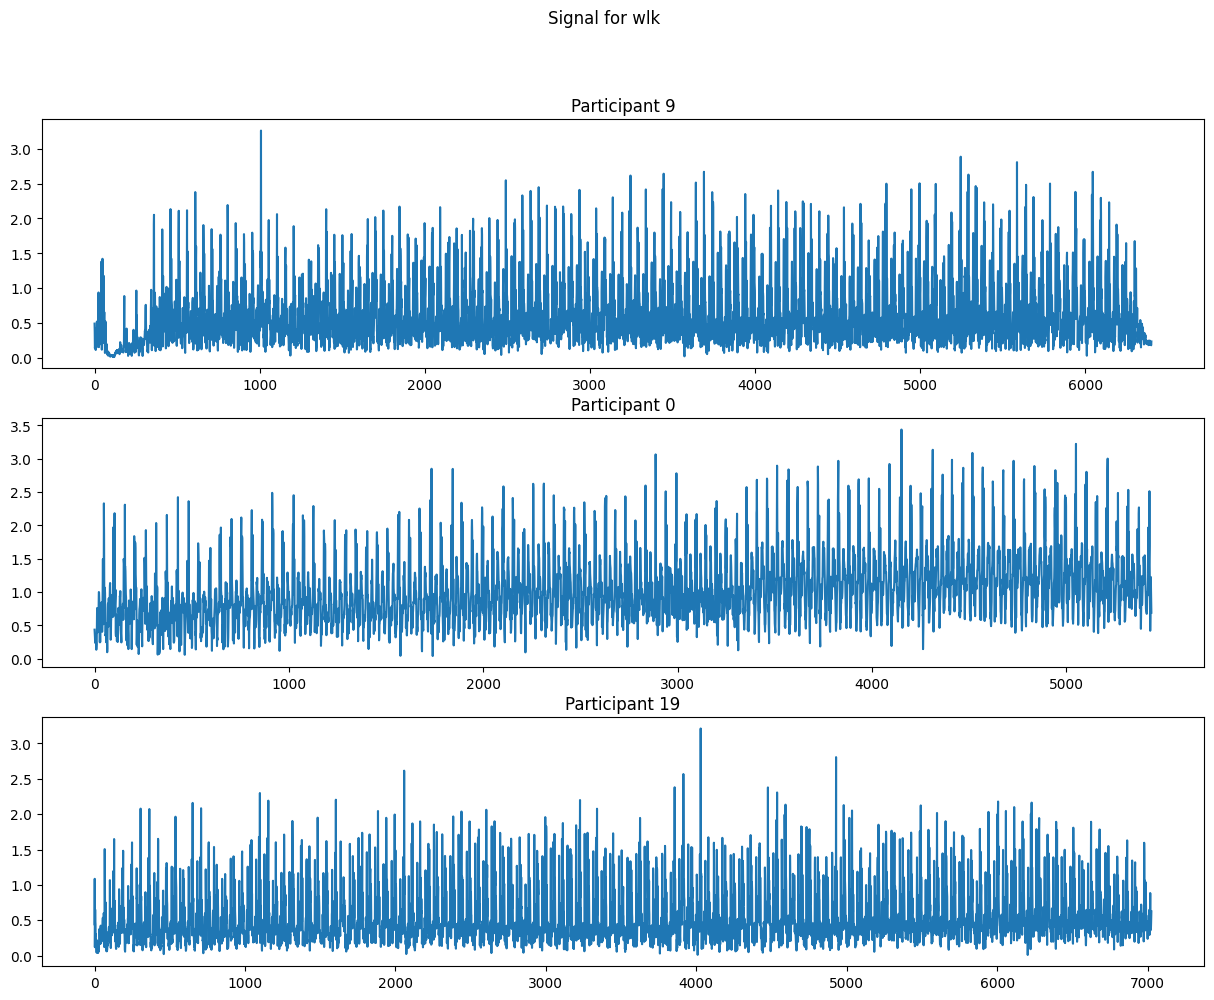

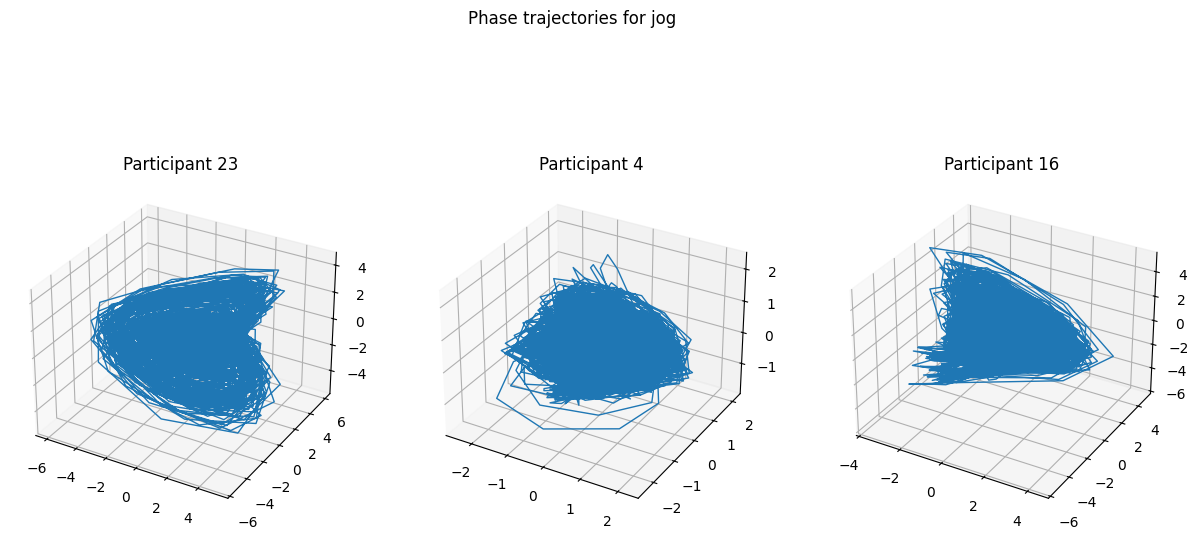

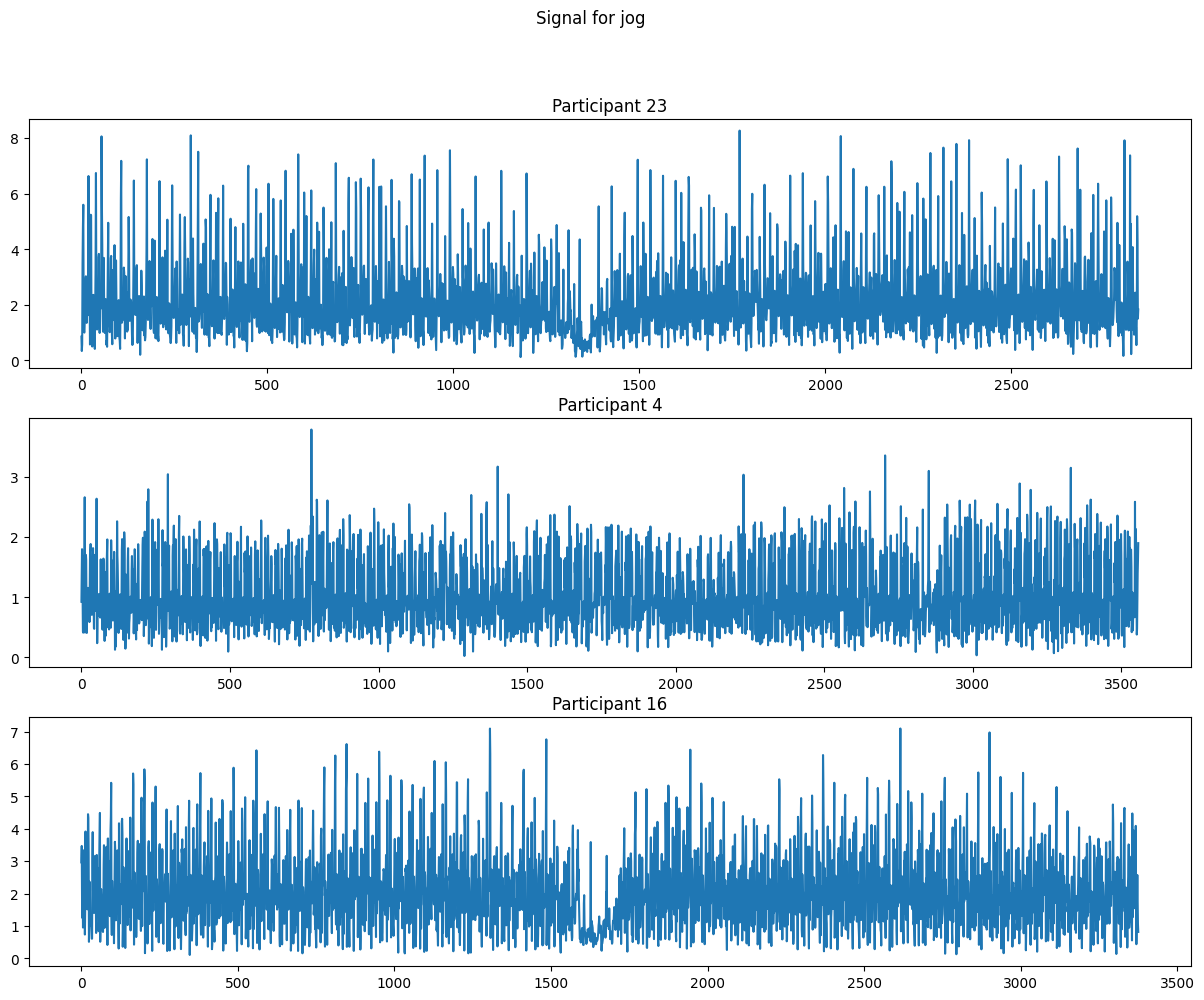

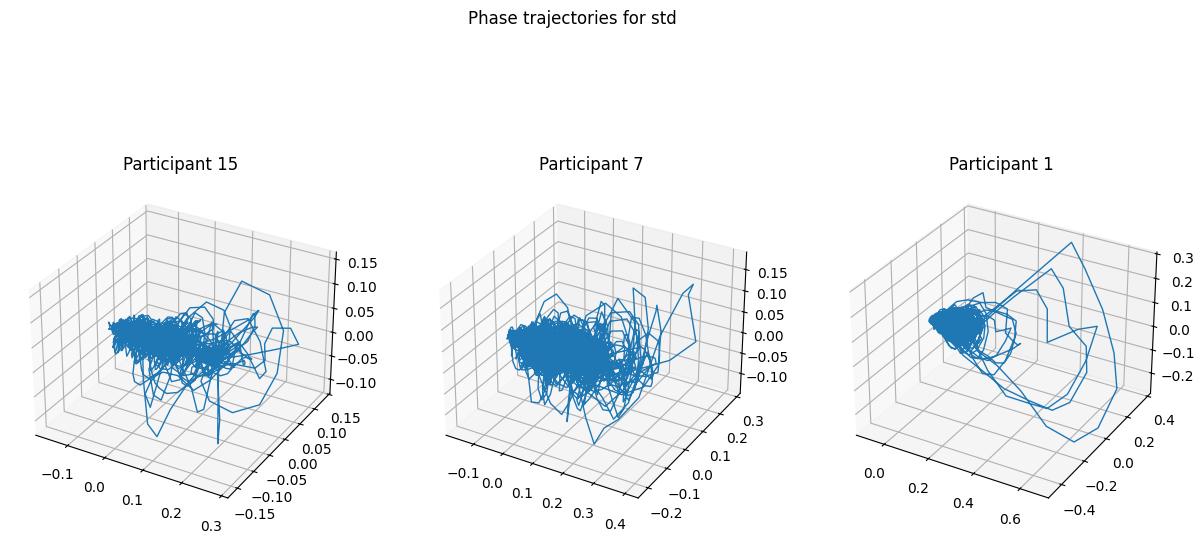

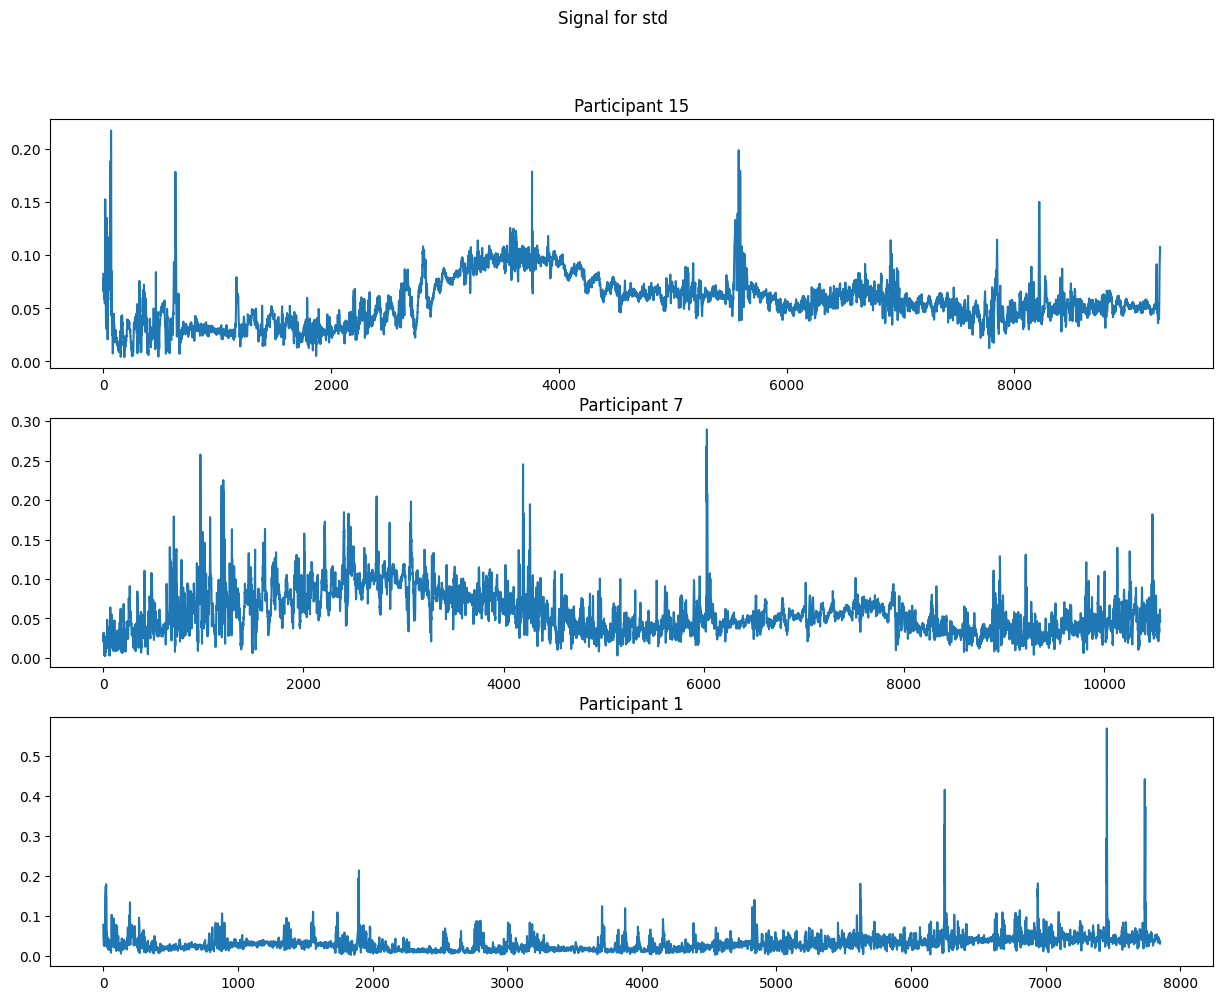

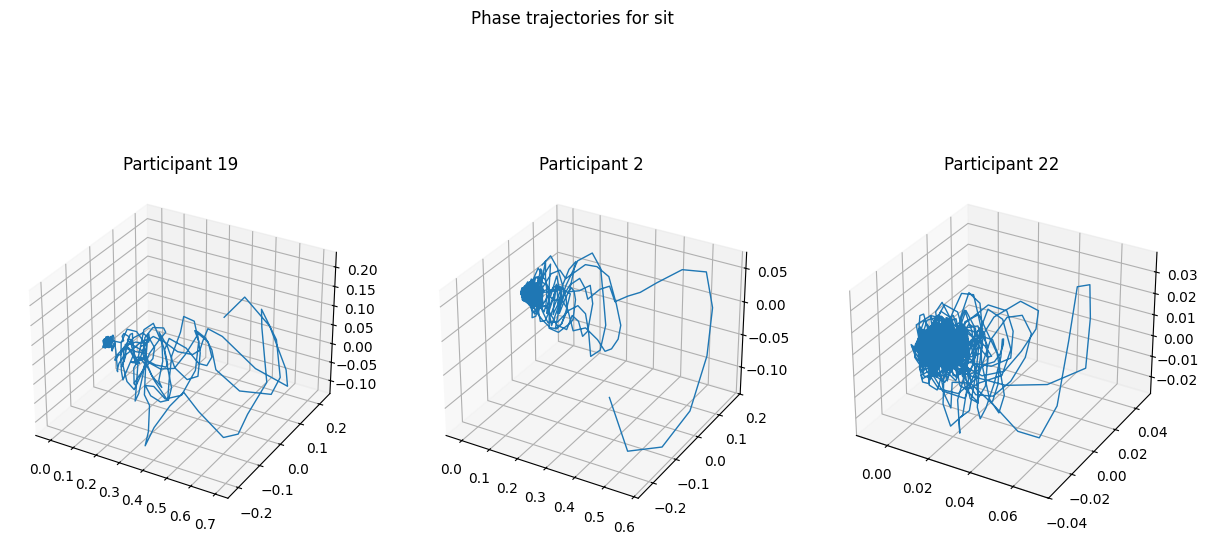

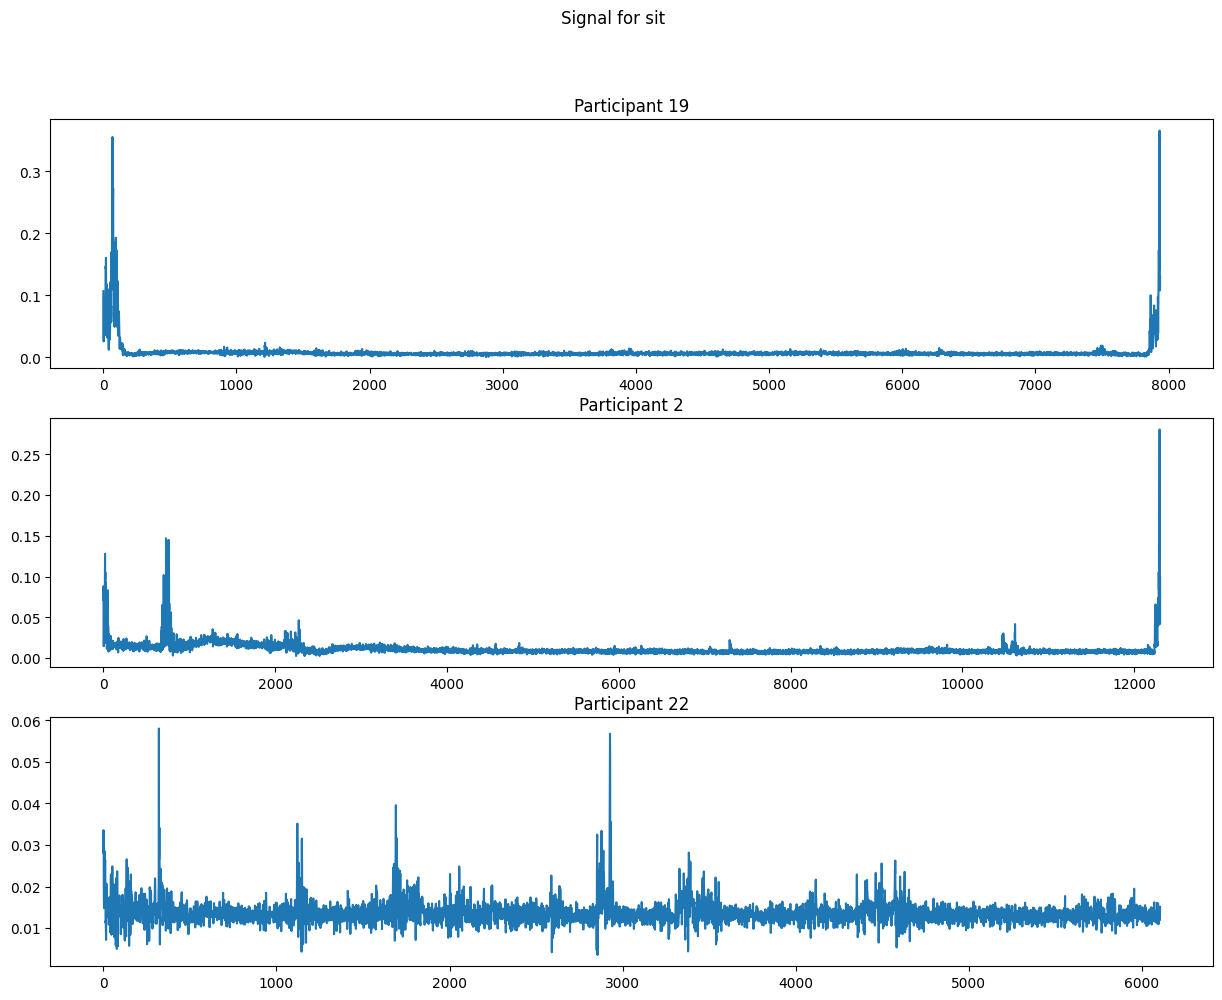

In [35]:
for activity in ACT_LABELS:
    dt_columns = set_data_types(["userAcceleration"])
    act_labels = [activity]
    trial_codes = [TRIAL_CODES[activity]]
    # get magnitude of the acceleration for each participant
    ts_df = creat_time_series(DATA_DIR, dt_columns, act_labels, trial_codes)
    
    # choose 3 random participants
    participants = np.random.choice(np.arange(NUM_PARTICIPANTS), SAMPLES_PER_ACTIVITY, replace=False)

    fig_phase = plt.figure(figsize=(15, 7))
    fig_phase.suptitle(f"Phase trajectories for {activity}")
    
    for i in range(SAMPLES_PER_ACTIVITY):
        # get time series for current participant
        ts = ts_df.loc[ts_df["id"] == participants[i], ["userAcceleration"]].values

        # build trajectory matrix
        traj_matrix = linalg.hankel(ts[:PHASE_SPACE_DIM], ts[PHASE_SPACE_DIM - 1:])
        # cut dimensions for vizualization
        if PHASE_SPACE_DIM > 3:
            traj_matrix = PCA(3).fit_transform(traj_matrix.T).T

        ax_phase = fig_phase.add_subplot(1, SAMPLES_PER_ACTIVITY, i + 1, projection='3d')
        ax_phase.plot(*traj_matrix, linewidth=1)
        ax_phase.set_title(f"Participant {participants[i]}")

    fig_ts = plt.figure(figsize=(15, 11))
    fig_ts.suptitle(f"Signal for {activity}")

    for i in range(SAMPLES_PER_ACTIVITY):
        # get time series for current participant
        ts = ts_df.loc[ts_df["id"] == participants[i], ["userAcceleration"]].values

        ax_ts = fig_ts.add_subplot(SAMPLES_PER_ACTIVITY, 1, i + 1)
        ax_ts.plot(ts)
        ax_ts.set_title(f"Participant {participants[i]}")